In [1]:
import torch
import torchvision
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
from collections import defaultdict
from datetime import datetime


In [221]:
from torchvision.datasets import MNIST

train_img = MNIST(root="./.cache", download=True).data.numpy()
train_labels = MNIST(root="./.cache", download=True).targets.numpy()

In [2]:
bn_logits_filename = "bn_logits_10_100.npy"

results_path = os.path.join("MNIST", "results")
bn_logits_path = os.path.join(results_path, bn_logits_filename)

data = np.load(bn_logits_path)

In [4]:
data.shape

(100, 60000, 10)

## Silhouette for 10 clusters 

In [321]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

x_cluster = data[-1]

cluster_model = KMeans(n_clusters=10, random_state=12)
clusters_pred = cluster_model.fit_predict(x_cluster)

In [322]:
sil_scores = silhouette_samples(x_cluster, clusters_pred)

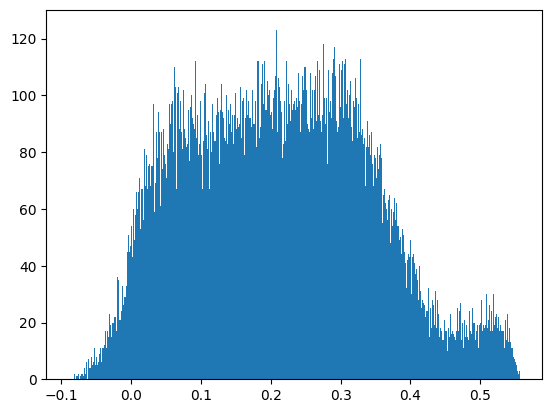

In [331]:
plt.hist(sil_scores, bins=1000)
plt.show()

In [348]:
stat_for_mask = sil_scores

eps_mean = 1e-4
stat_mean = stat_for_mask.mean()
mean_region_mask = (stat_for_mask < (stat_mean+eps_mean)) * (stat_for_mask > (stat_mean-eps_mean)) 
left_tale_mask = stat_for_mask < -0.07
right_tale_mask = stat_for_mask > 0.55

left_tale = l2_embs[:, left_tale_mask]
right_tale = l2_embs[:, right_tale_mask]
mean_region = l2_embs[:, mean_region_mask]

left_tale.shape, mean_region.shape, right_tale.shape

((100, 23), (100, 31), (100, 29))

Probably closer to another cluster

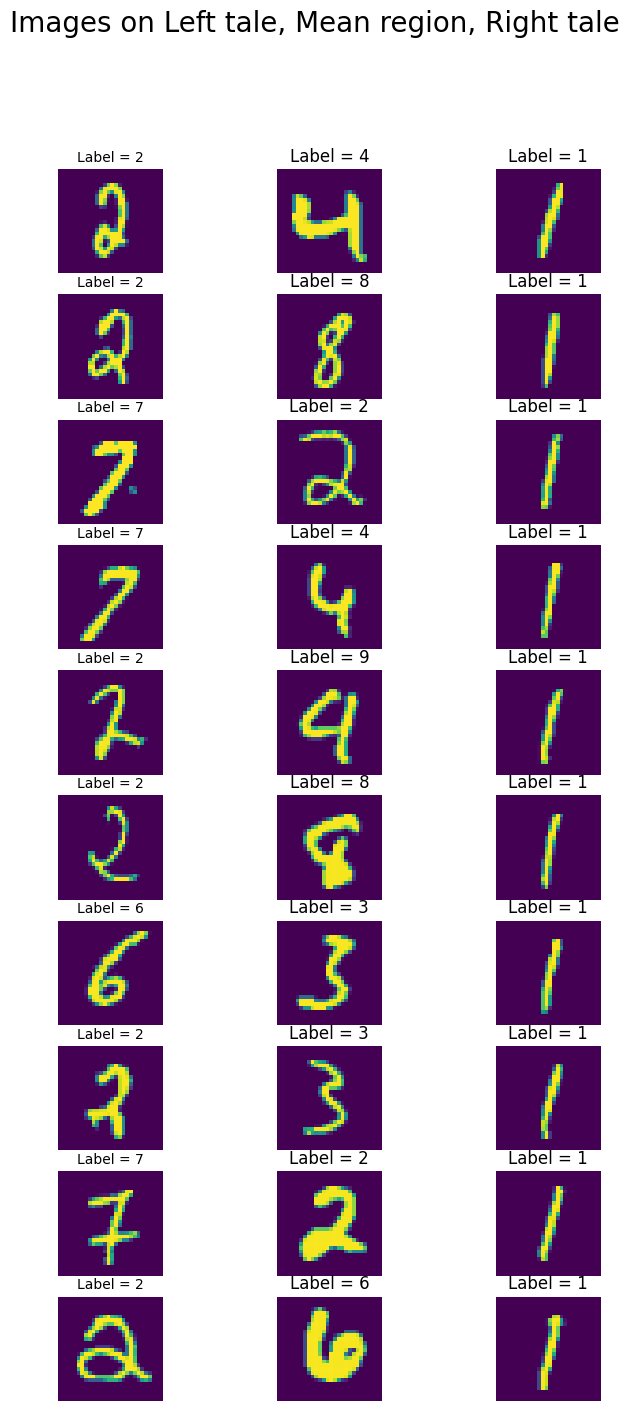

In [371]:
f, axes = plt.subplots(10, 3, figsize=(8,16))

for i, sample_id in enumerate(range(min(mask_use.sum(), 10))):
    ax_row = axes[i]
    
    ax_row[0].imshow(train_img[left_tale_mask][sample_id])
    ax_row[0].set_title(f"Label = {train_labels[left_tale_mask][sample_id]}", fontsize=10)
    
    ax_row[1].imshow(train_img[mean_region_mask][sample_id])
    ax_row[1].set_title(f"Label = {train_labels[mean_region_mask][sample_id]}")
    
    ax_row[2].imshow(train_img[right_tale_mask][sample_id])
    ax_row[2].set_title(f"Label = {train_labels[right_tale_mask][sample_id]}")


f.suptitle('Images on Left tale, Mean region, Right tale ', fontsize=20)
for ax in axes.ravel():
    ax.set_axis_off()   
    
plt.show()

## 2) Difference between embeddings of adjacent epochs

In [11]:
# emb_t - emb_(t-1)
dif = data[1:] - data[:-1]

In [ ]:
"""
Statistics of difference:
1) Mean
2) Max
3) L2
4) L1
5) Variance
"""

### L1 norm - difference bw adj embs

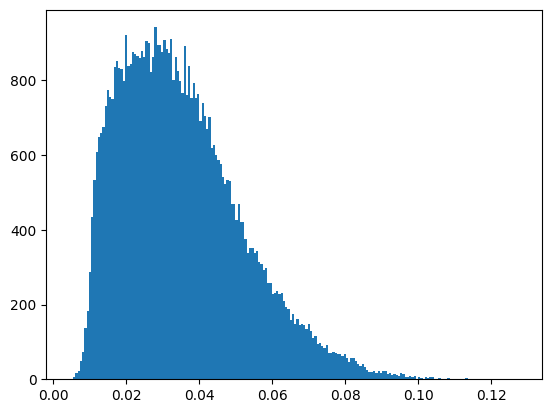

In [376]:
mean_dif = np.linalg.norm(dif, axis=2, ord=1)

mean_dif_var = mean_dif.var(axis=0)
plt.hist(mean_dif_var, bins=200)
plt.show()

In [377]:
left_tale_mask = mean_dif_var < 0.007
right_tale_mask = mean_dif_var > 0.11

left_tale = mean_dif[:, left_tale_mask]
right_tale = mean_dif[:, right_tale_mask]

left_tale.shape, right_tale.shape

((99, 33), (99, 13))

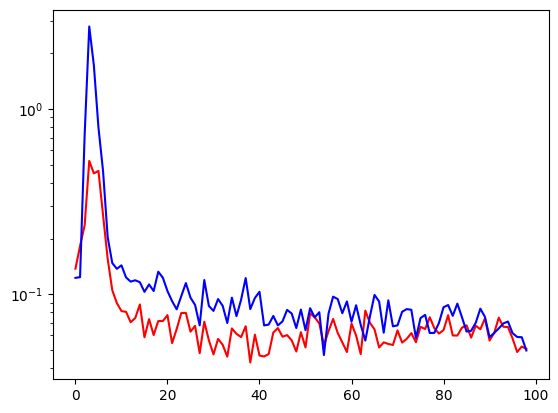

In [378]:
# mean of variance of examples with var of mean difference > threshold
plt.plot(left_tale.mean(axis=1), c='r')
# mean of variance of examples with var of mean difference ~ mean
plt.plot(right_tale.mean(axis=1), c='b')

plt.yscale('log')

plt.show()

#### Plotting image examples

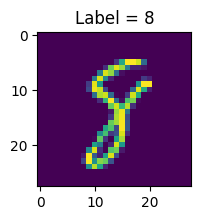

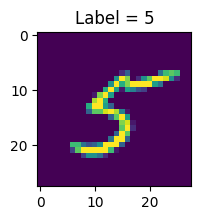

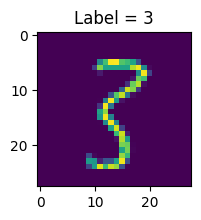

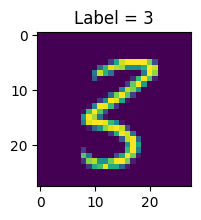

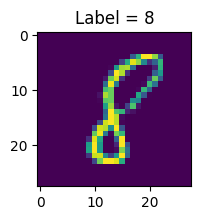

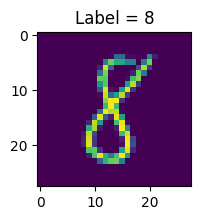

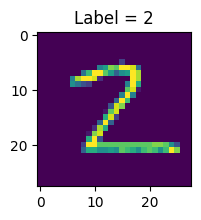

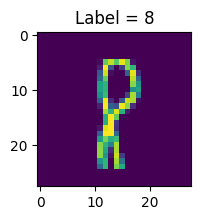

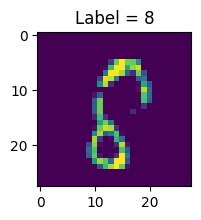

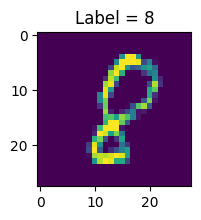

In [223]:
mask_use = left_tale_mask

for sample_id in range(min(mask_use.sum(), 10)):
    plt.figure(figsize=(4,2))
    plt.title(f"Label = {train_labels[mask_use][sample_id]}")
    plt.imshow(train_img[mask_use][sample_id])
    plt.show()

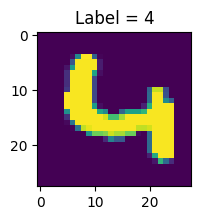

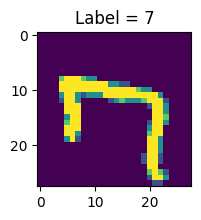

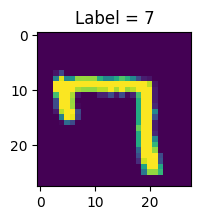

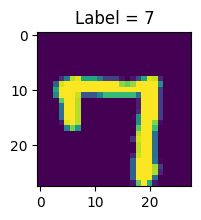

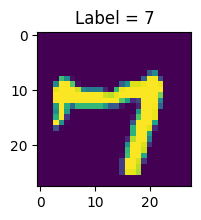

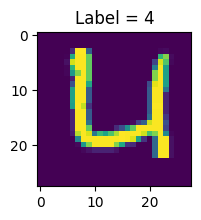

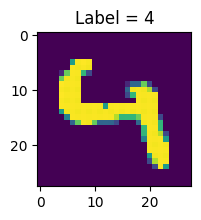

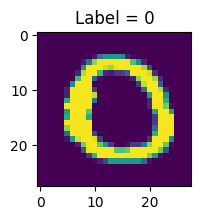

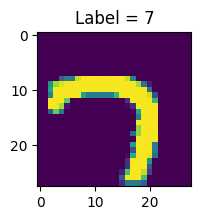

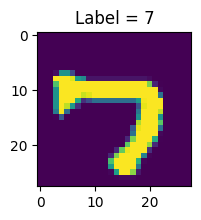

In [222]:
mask_use = right_tale_mask

for sample_id in range(min(mask_use.sum(), 10)):
    plt.figure(figsize=(4,2))
    plt.title(f"Label = {train_labels[mask_use][sample_id]}")
    plt.imshow(train_img[mask_use][sample_id])
    plt.show()

### Variance - difference bw adj embs

In [232]:
stat_dif = dif.var(axis=2)

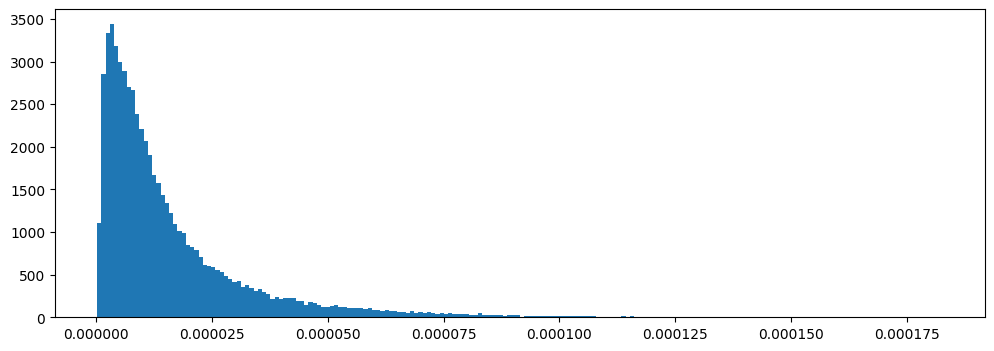

In [235]:
stat_dif_var = stat_dif.var(axis=0)
plt.figure(figsize=(12,4))
plt.hist(stat_dif_var, bins=200)
plt.show()

In [271]:
left_tale_mask = stat_dif_var < 3.9e-7
right_tale_mask = stat_dif_var > 16e-5

left_tale = stat_dif[:, left_tale_mask]
right_tale = stat_dif[:, right_tale_mask]

eps_mean = 1e-8
stat_dif_var_mean = stat_dif_var.mean()
mean_region_mask = (stat_dif_var < (stat_dif_var_mean+eps_mean)) * (stat_dif_var > (stat_dif_var_mean-eps_mean)) 
mean_region = stat_dif[:, mean_region_mask]

left_tale.shape, mean_region.shape, right_tale.shape

((99, 11), (99, 34), (99, 10))

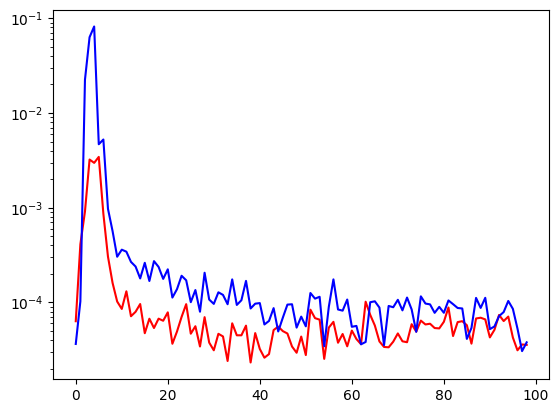

In [272]:
# mean of variance of examples with var of mean difference > threshold
plt.plot(left_tale.mean(axis=1), c='r')
# mean of variance of examples with var of mean difference ~ mean
plt.plot(right_tale.mean(axis=1), c='b')

plt.yscale('log')

plt.show()

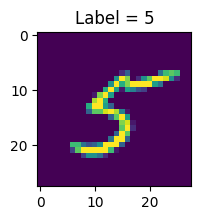

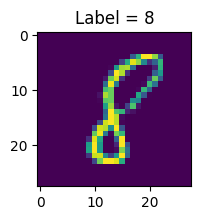

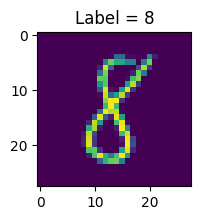

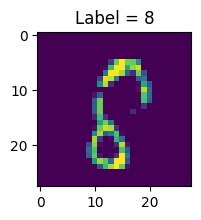

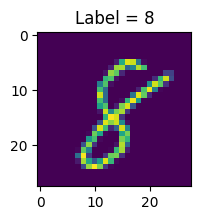

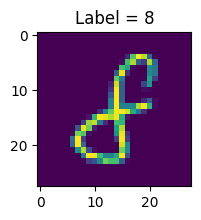

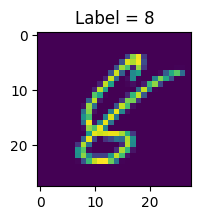

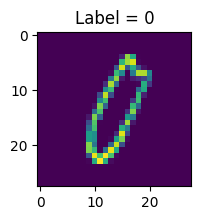

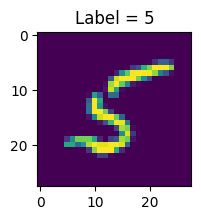

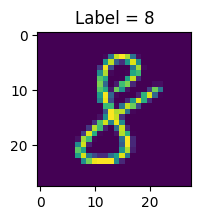

In [274]:
mask_use = left_tale_mask

for sample_id in range(min(mask_use.sum(), 10)):
    plt.figure(figsize=(4,2))
    plt.title(f"Label = {train_labels[mask_use][sample_id]}")
    plt.imshow(train_img[mask_use][sample_id])
    plt.show()

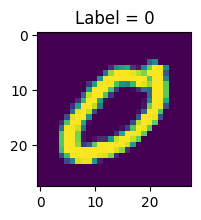

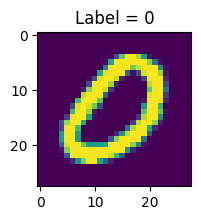

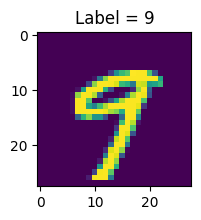

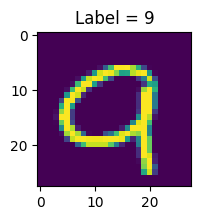

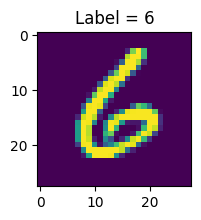

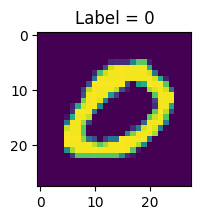

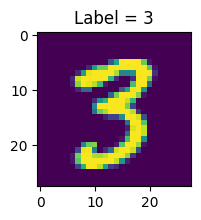

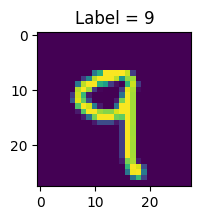

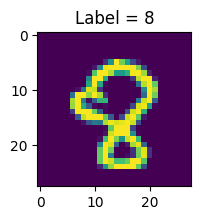

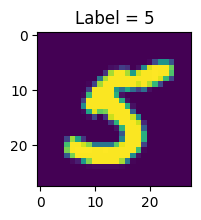

In [275]:
mask_use = mean_region_mask

for sample_id in range(min(mask_use.sum(), 10)):
    plt.figure(figsize=(4,2))
    plt.title(f"Label = {train_labels[mask_use][sample_id]}")
    plt.imshow(train_img[mask_use][sample_id])
    plt.show()

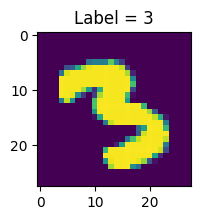

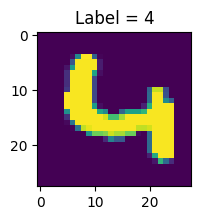

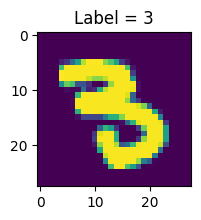

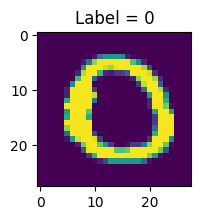

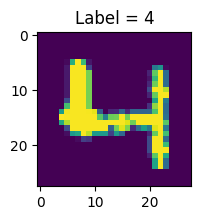

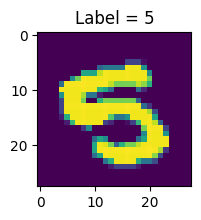

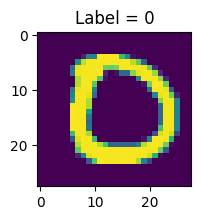

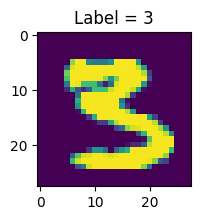

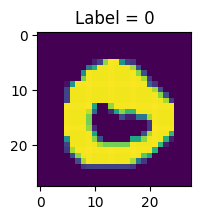

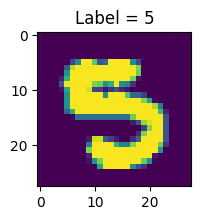

In [273]:
mask_use = right_tale_mask

for sample_id in range(min(mask_use.sum(), 10)):
    plt.figure(figsize=(4,2))
    plt.title(f"Label = {train_labels[mask_use][sample_id]}")
    plt.imshow(train_img[mask_use][sample_id])
    plt.show()

## 3) L2 of embeddings at t epoch

In [277]:
l2_embs = np.linalg.norm(data, ord=2, axis=2)

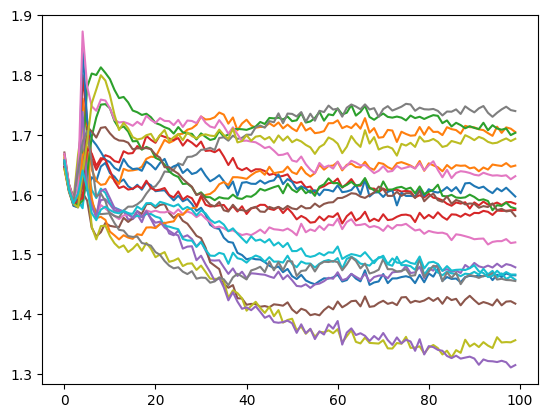

In [372]:
idx_plot = np.random.choice(l2_embs.shape[1], size=20, replace=False, )

plt.plot(l2_embs[:, idx_plot])
plt.show()

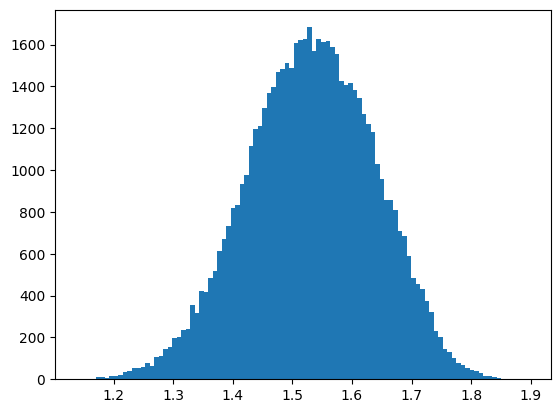

In [292]:
plt.hist(l2_embs[-1, :], bins=100)
plt.plot();

In [311]:
stat_for_mask = l2_embs[-1, :]

left_tale_mask = stat_for_mask < 1.18
right_tale_mask = stat_for_mask > 1.85

left_tale = l2_embs[:, left_tale_mask]
right_tale = l2_embs[:, right_tale_mask]

eps_mean = 1e-4
stat_dif_var_mean = stat_for_mask.mean()
mean_region_mask = (stat_for_mask < (stat_dif_var_mean+eps_mean)) * (stat_for_mask > (stat_dif_var_mean-eps_mean)) 
mean_region = l2_embs[:, mean_region_mask]

left_tale.shape, mean_region.shape, right_tale.shape

((100, 26), (100, 44), (100, 13))

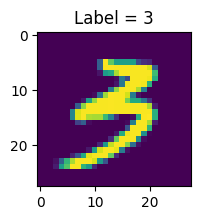

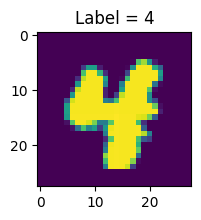

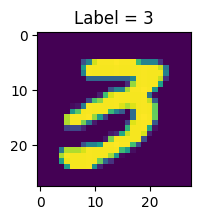

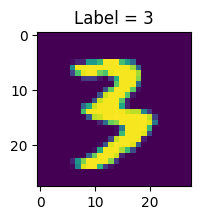

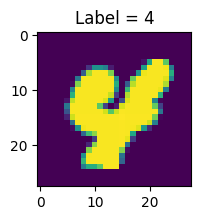

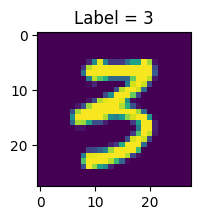

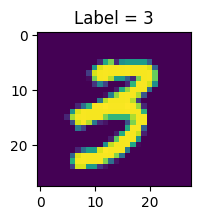

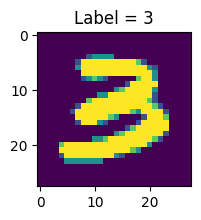

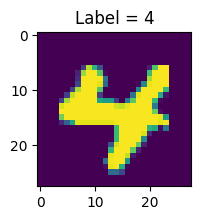

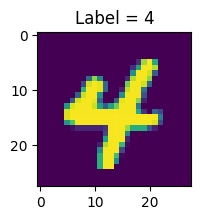

In [312]:
mask_use = left_tale_mask

for sample_id in range(min(mask_use.sum(), 10)):
    plt.figure(figsize=(4,2))
    plt.title(f"Label = {train_labels[mask_use][sample_id]}")
    plt.imshow(train_img[mask_use][sample_id])
    plt.show()

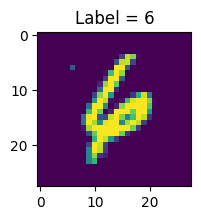

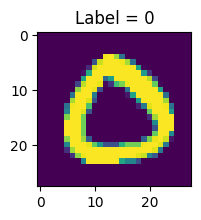

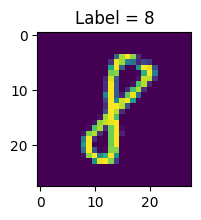

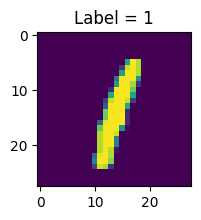

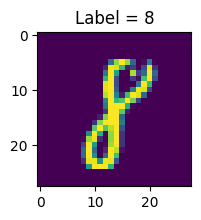

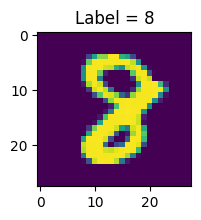

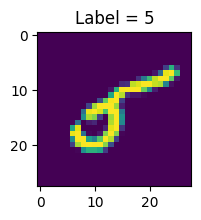

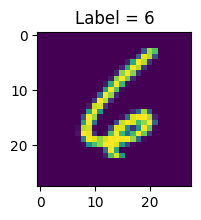

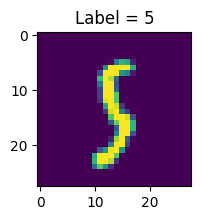

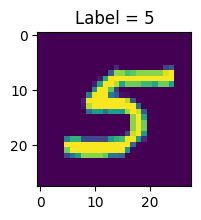

In [313]:
mask_use = mean_region_mask

for sample_id in range(min(mask_use.sum(), 10)):
    plt.figure(figsize=(4,2))
    plt.title(f"Label = {train_labels[mask_use][sample_id]}")
    plt.imshow(train_img[mask_use][sample_id])
    plt.show()

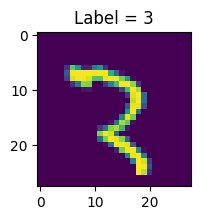

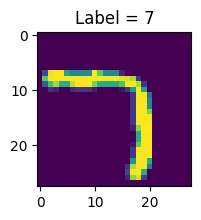

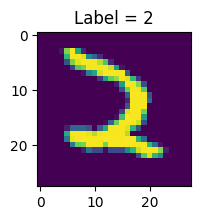

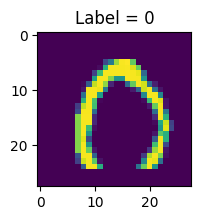

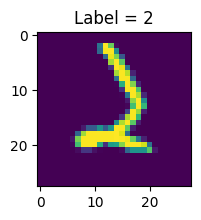

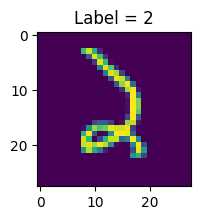

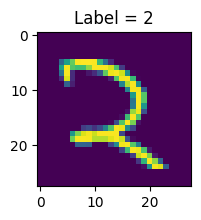

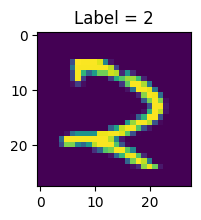

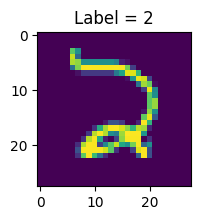

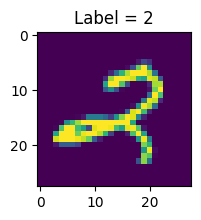

In [314]:
mask_use = right_tale_mask

for sample_id in range(min(mask_use.sum(), 10)):
    plt.figure(figsize=(4,2))
    plt.title(f"Label = {train_labels[mask_use][sample_id]}")
    plt.imshow(train_img[mask_use][sample_id])
    plt.show()